In [1]:
import numpy as np
import anjl
import plotly.io

In [2]:
plotly.io.renderers.default = "plotly_mimetype+notebook_connected"

## Example 1

In [3]:
D1 = np.array(
    [  # A B C D
        [0, 4, 5, 10],
        [4, 0, 7, 12],
        [5, 7, 0, 9],
        [10, 12, 9, 0],
    ],
    dtype=np.float32,
)
Z1 = anjl.canonical_nj(D1)
Z1

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [4]:
root1 = anjl.to_tree(Z1)
print(root1)

Node(id=6, dist=0, count=4)
    Node(id=3, dist=3.5, count=1)
    Node(id=5, dist=3.5, count=3)
        Node(id=2, dist=2.0, count=1)
        Node(id=4, dist=2.0, count=2)
            Node(id=0, dist=1.0, count=1)
            Node(id=1, dist=3.0, count=1)


In [5]:
df_internal_nodes, df_leaf_nodes, df_edges = anjl.layout_equal_angle(tree=root1)

In [6]:
df_leaf_nodes

x         y  id
0  2.474874  2.474874   3
1 -1.060660 -3.889087   2
2 -5.181981 -3.181981   0
3 -6.596194 -0.353553   1

In [7]:
df_internal_nodes

x         y  id
0  0.000000  0.000000   6
1 -2.474874 -2.474874   5
2 -4.474874 -2.474874   4

In [8]:
df_edges

x         y
0   0.000000  0.000000
1   2.474874  2.474874
2        NaN       NaN
3   0.000000  0.000000
4  -2.474874 -2.474874
5        NaN       NaN
6  -2.474874 -2.474874
7  -1.060660 -3.889087
8        NaN       NaN
9  -2.474874 -2.474874
10 -4.474874 -2.474874
11       NaN       NaN
12 -4.474874 -2.474874
13 -5.181981 -3.181981
14       NaN       NaN
15 -4.474874 -2.474874
16 -6.596194 -0.353553
17       NaN       NaN

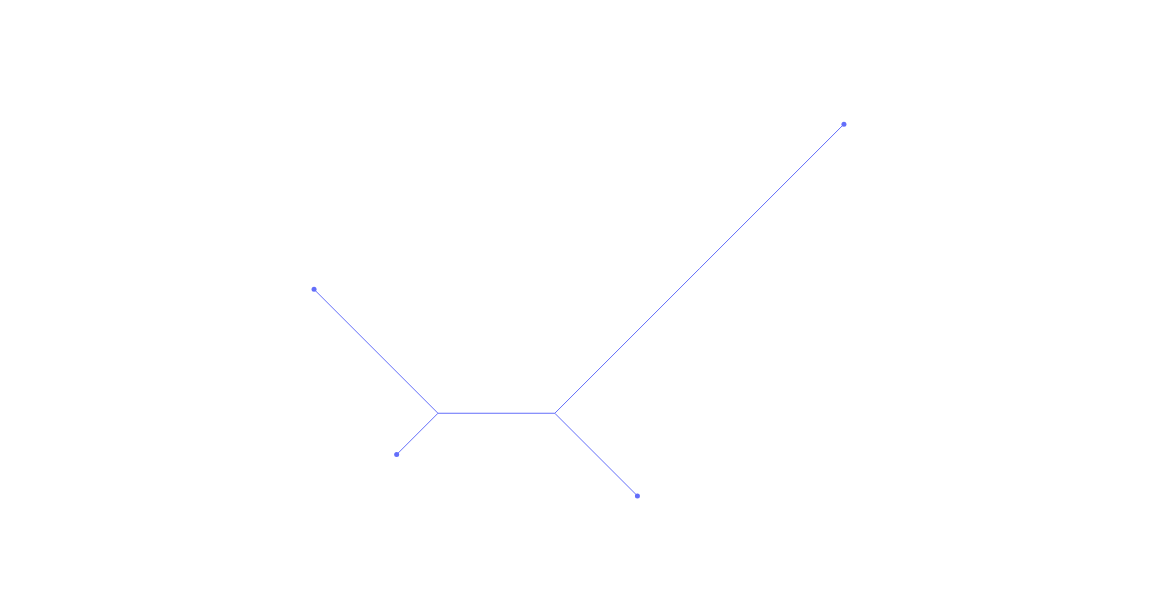

In [9]:
anjl.plot_equal_angle(root1)

## Example 2

In [10]:
D2 = np.array(
    [  # a b c d e
        [0, 5, 9, 9, 8],
        [5, 0, 10, 10, 9],
        [9, 10, 0, 8, 7],
        [9, 10, 8, 0, 3],
        [8, 9, 7, 3, 0],
    ],
    dtype=np.float32,
)
Z2 = anjl.canonical_nj(D2)
Z2

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [11]:
root2 = anjl.to_tree(Z2)
print(root2)

Node(id=8, dist=0, count=5)
    Node(id=4, dist=0.5, count=1)
    Node(id=7, dist=0.5, count=4)
        Node(id=3, dist=2.0, count=1)
        Node(id=6, dist=2.0, count=3)
            Node(id=2, dist=4.0, count=1)
            Node(id=5, dist=3.0, count=2)
                Node(id=0, dist=2.0, count=1)
                Node(id=1, dist=3.0, count=1)


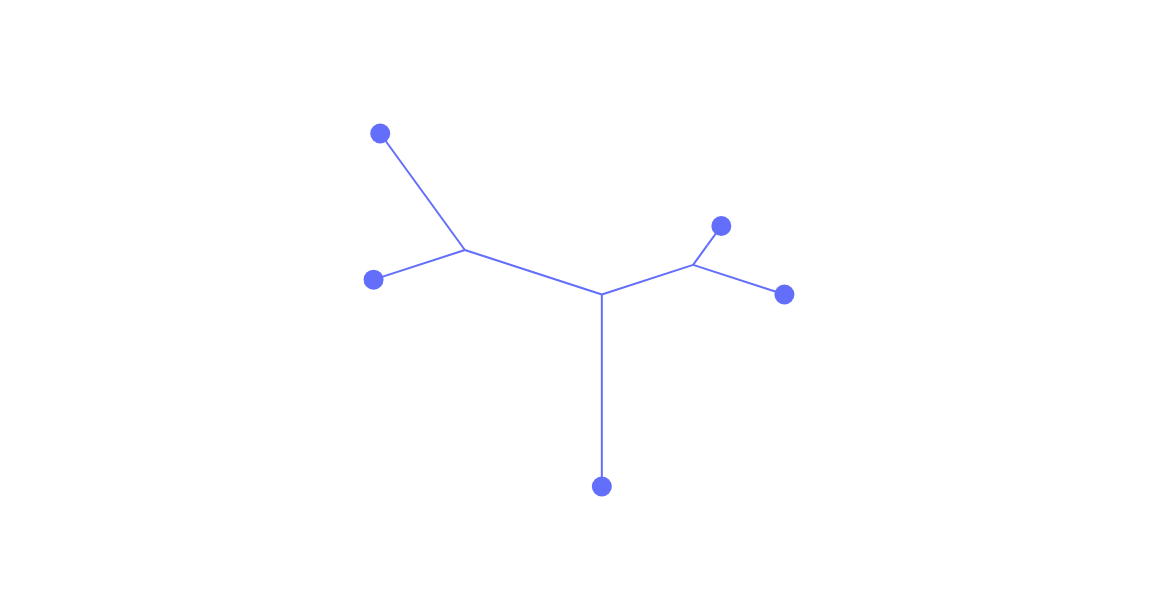

In [12]:
anjl.plot_equal_angle(root2, line_width=2, marker_size=20)

## Example 3

In [13]:
import zarr
from scipy.spatial.distance import squareform

In [14]:
small = zarr.open("data/6d6ba5a54fade30470a83838d1de6358/results.zarr.zip")
D3_condensed = small["dist"][:]
D3 = squareform(D3_condensed)
D3.shape

(586, 586)

In [15]:
Z3 = anjl.canonical_nj(D3)
Z3

array([[2.4300000e+02, 2.6000000e+02, 3.7729450e+01, 5.1270550e+01,
        2.0000000e+00],
       [1.8800000e+02, 5.8600000e+02, 5.3296741e+01, 7.7032590e+00,
        3.0000000e+00],
       [1.0600000e+02, 3.3000000e+02, 7.9160652e+01, 4.0839348e+01,
        2.0000000e+00],
       ...,
       [1.1600000e+03, 1.1660000e+03, 5.1909703e-01, 1.6534364e-01,
        3.5200000e+02],
       [1.1670000e+03, 1.1680000e+03, 1.3256671e-01, 9.5238224e-02,
        4.8300000e+02],
       [1.1630000e+03, 1.1690000e+03, 1.9038522e-01, 1.9038522e-01,
        5.8600000e+02]], dtype=float32)

In [16]:
root3 = anjl.to_tree(Z3)
root3

Node(id=1170, dist=0, count=586)

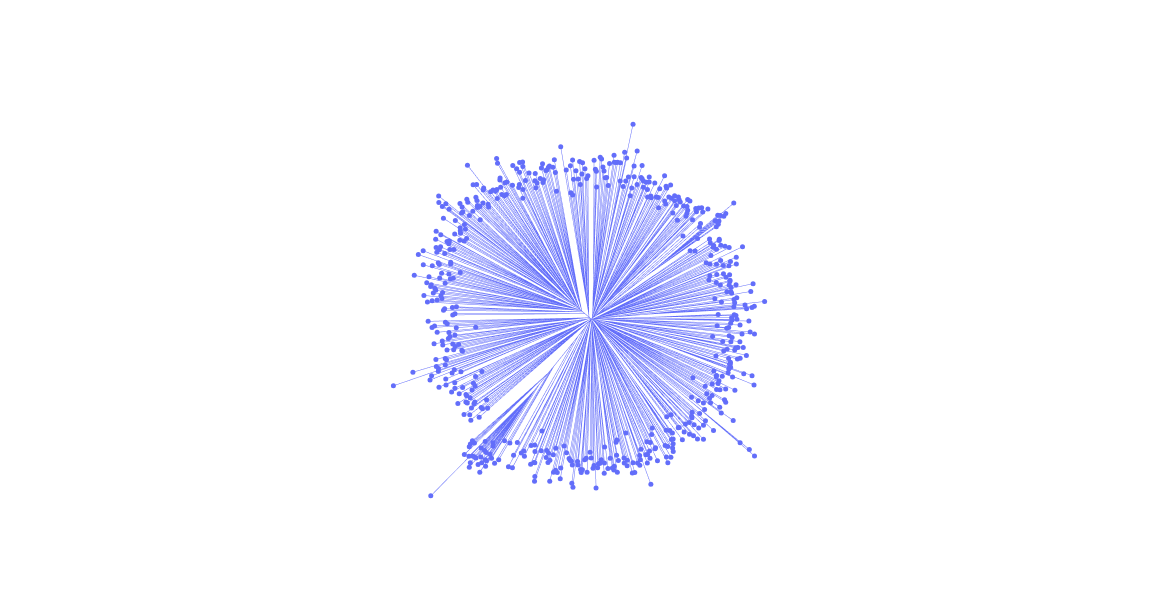

In [17]:
anjl.plot_equal_angle(root3, line_width=0.5)

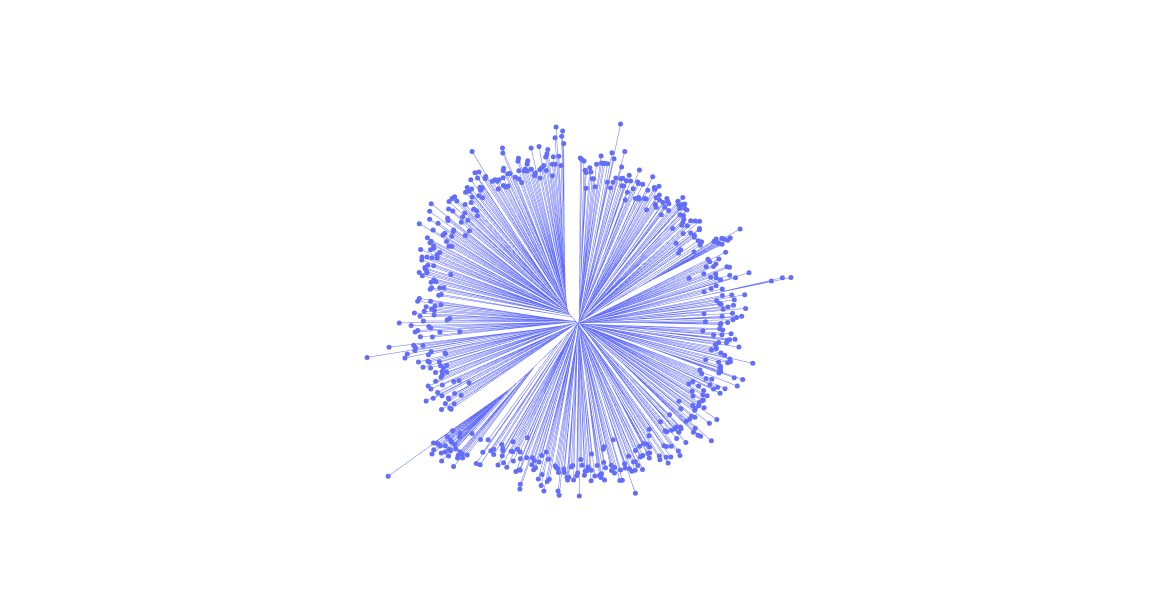

In [18]:
anjl.plot_equal_angle(root3, line_width=0.5, count_sort=True)

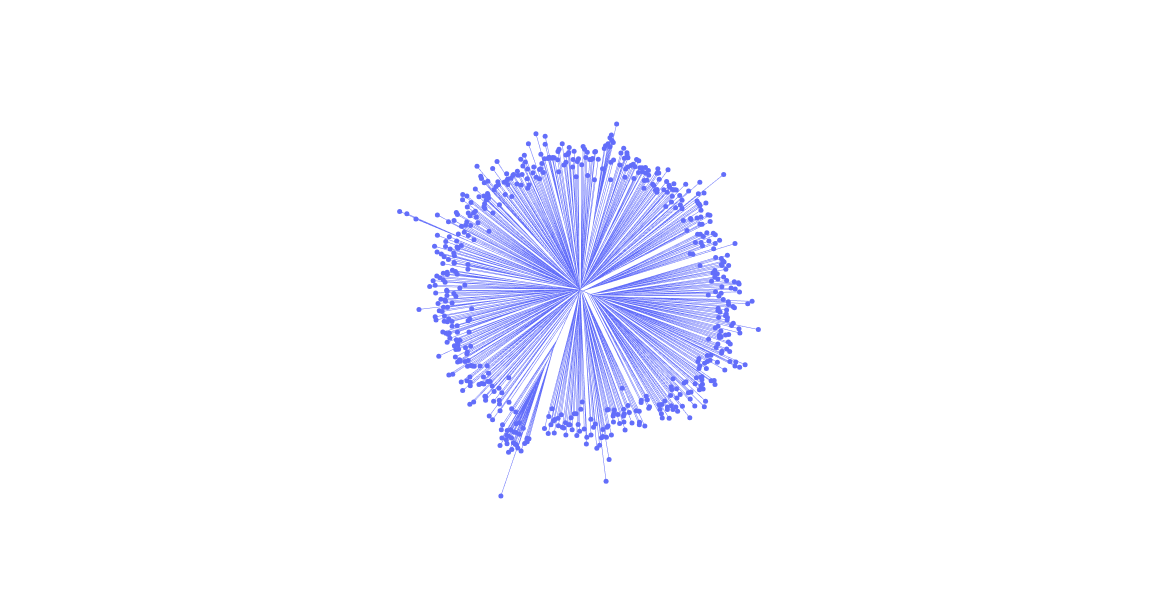

In [19]:
anjl.plot_equal_angle(root3, line_width=0.5, distance_sort=True)

## Example 4

In [19]:
medium = zarr.open("data/0b5748b994e124cca2bdb7bc34682af0/results.zarr.zip")
D4_condensed = medium["dist"][:]
D4 = squareform(D4_condensed)
D4.shape

(3081, 3081)

In [20]:
Z4 = anjl.canonical_nj(D4)
Z4

array([[1.8700000e+03, 1.8810000e+03, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00],
       [1.8830000e+03, 3.0810000e+03, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00],
       [1.9040000e+03, 3.0820000e+03, 0.0000000e+00, 0.0000000e+00,
        4.0000000e+00],
       ...,
       [6.1540000e+03, 6.1570000e+03, 2.9235205e-01, 7.0959538e-02,
        2.0170000e+03],
       [6.1560000e+03, 6.1580000e+03, 7.6772496e-02, 5.2833185e-02,
        2.5630000e+03],
       [6.1490000e+03, 6.1590000e+03, 1.6368026e-01, 1.6368026e-01,
        3.0810000e+03]], dtype=float32)

In [21]:
root4 = anjl.to_tree(Z4)
root4

Node(id=6160, dist=None, count=3081)

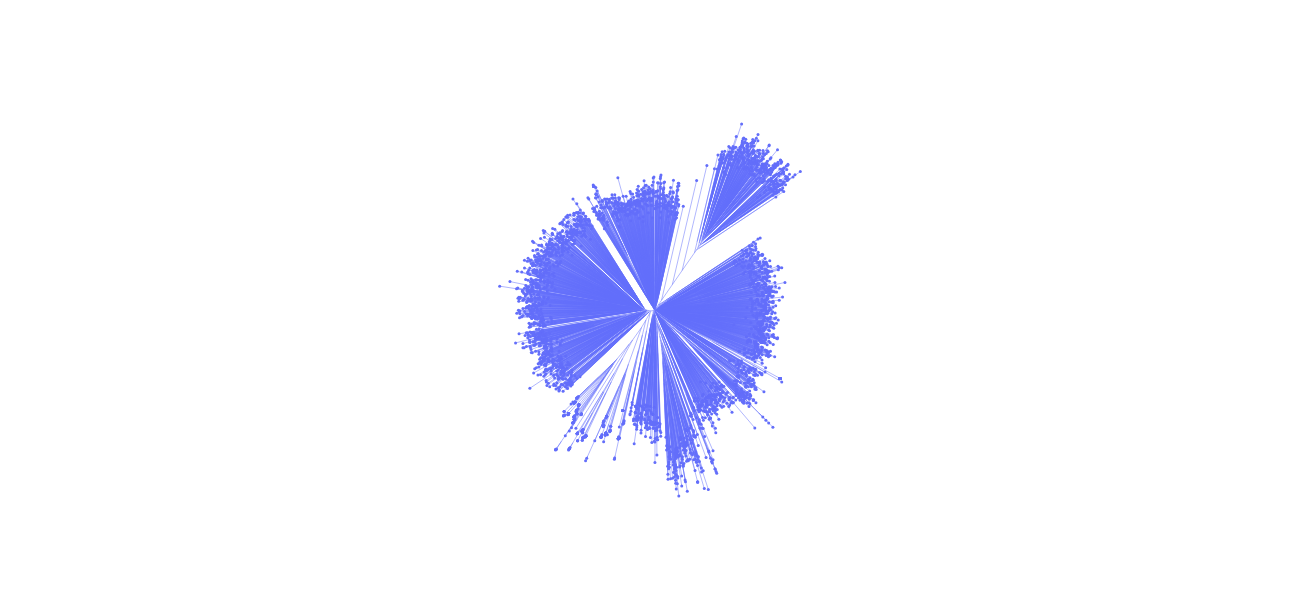

In [22]:
anjl.plot_equal_angle(
    root4, line_width=0.5, marker_size=3, width=600, height=600, render_mode="svg"
)

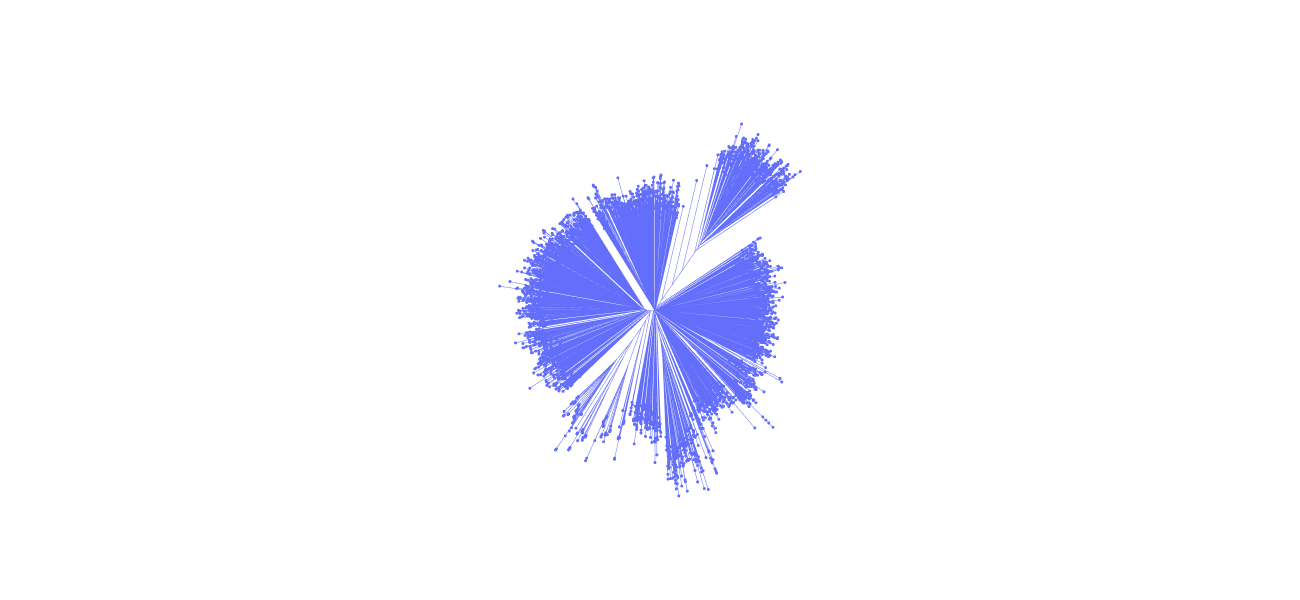

In [23]:
anjl.plot_equal_angle(
    root4, line_width=0.5, marker_size=3, width=600, height=600, render_mode="webgl"
)